In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load the data
file_path = './climate_crop.csv'
data = pd.read_csv(file_path)
data=data.drop(columns=['Item','Continent','Year','Area'],axis=1)

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  \
count                    28242.00000       28242.000000  28242.000000   
mean                      1149.05598       37076.909344     20.542627   
std                        709.81215       59958.784665      6.312051   
min                         51.00000           0.040000      1.300000   
25%                        593.00000        1702.000000     16.702500   
50%                       1083.00000       17529.440000     21.510000   
75%                       1668.00000       48687.880000     26.000000   
max                       3240.00000      367778.000000     30.650000   

         hg/ha_yield  
count   28242.000000  
mean    77053.332094  
std     84956.612897  
min        50.000000  
25%     19919.250000  
50%     38295.000000  
75%    104676.750000  
max    501412.000000  


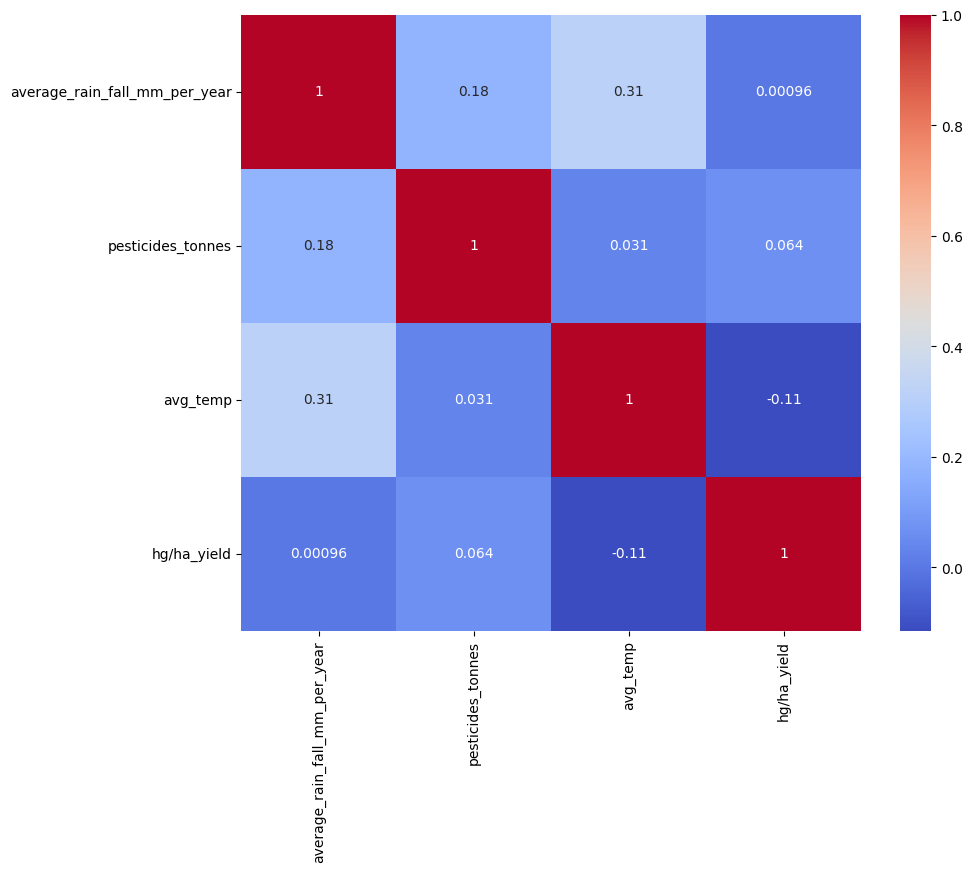

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


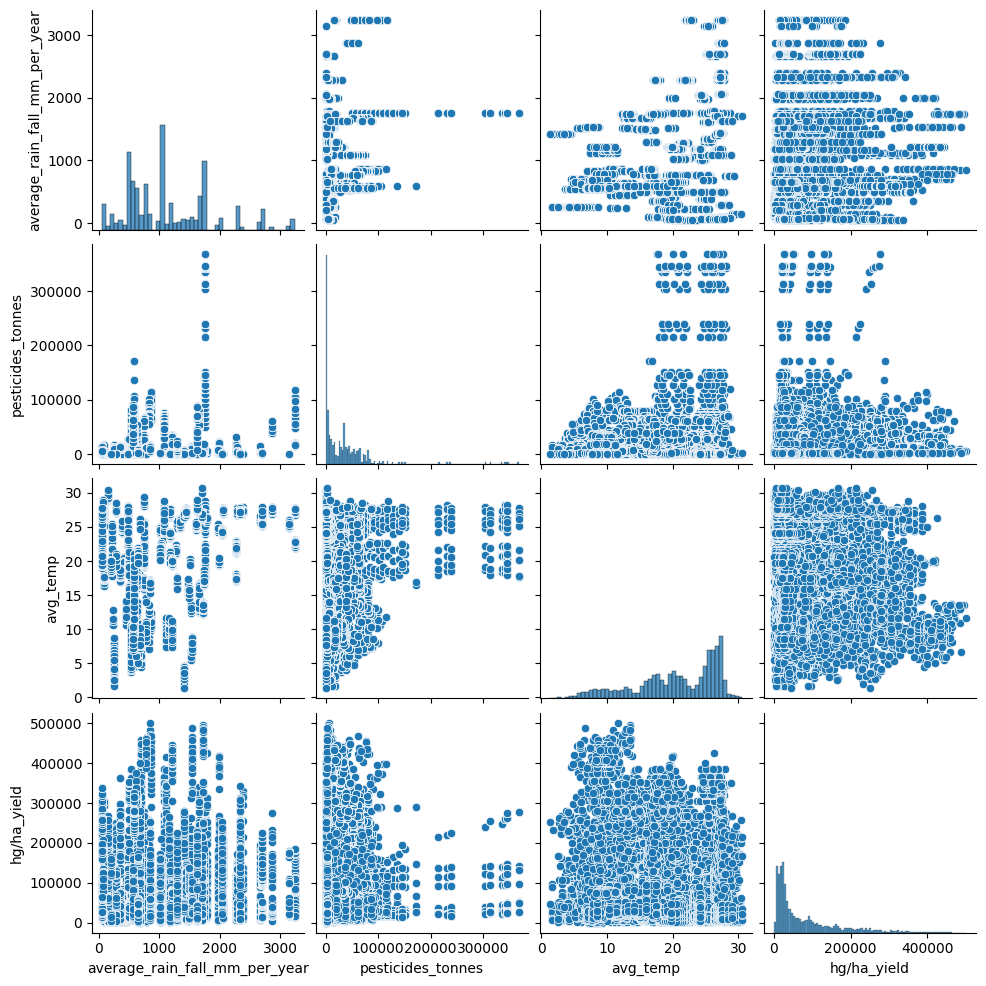

In [19]:
print(data.describe())

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

In [20]:
# Selecting the relevant columns
features = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
target = 'hg/ha_yield'

# Handle any missing values if present
data = data.dropna()

# Separate the features and target
X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:

# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)


In [23]:
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predict using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

In [24]:
# Evaluate the models
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate Linear Regression
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")

# Evaluate Random Forest
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

# Evaluate Gradient Boosting
mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")

# Fine-tune the best model (Gradient Boosting)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Linear Regression - MSE: 7098843519.789056, R2: 0.021344837717794163
Random Forest - MSE: 8719701760.515121, R2: -0.20210864173872367
Gradient Boosting - MSE: 6346526031.938711, R2: 0.12506023743149264
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=2)

In [25]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best, r2_best = mean_squared_error(y_test, y_pred_best), r2_score(y_test, y_pred_best)
print(f"Best Model - MSE: {mse_best}, R2: {r2_best}")
print(f"Best Model Parameters: {best_params}")

Best Model - MSE: 6304962298.762952, R2: 0.13079026400874927
Best Model Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
